In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hiesba_percentiles.csv')
df.head()

year     state percentile  mean  median  minimum  maximum
0  2019  Malaysia        1st   957    1001      NaN   1141.0
1  2019  Malaysia        2nd  1284    1244   1141.0   1459.0
2  2019  Malaysia        3rd  1556    1559   1460.0   1641.0
3  2019  Malaysia        4th  1718    1718   1642.0   1789.0
4  2019  Malaysia        5th  1858    1856   1790.0   1928.0

In [3]:
df.describe()

year           mean        median       minimum       maximum
count  3400.000000    3400.000000   3400.000000   3366.000000   3366.000000
mean   2020.500000    7765.838824   7701.645294   7553.986631   7546.509804
std       1.500221    7189.765820   6752.670857   6118.880789   6092.639737
min    2019.000000     740.000000    750.000000    866.000000    866.000000
25%    2019.000000    3607.000000   3608.750000   3627.750000   3623.500000
50%    2020.500000    5819.000000   5818.500000   5830.000000   5824.000000
75%    2022.000000    9515.250000   9520.250000   9467.500000   9465.000000
max    2022.000000  120000.000000  85605.000000  68147.000000  67299.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3400 non-null   int64  
 1   state       3400 non-null   object 
 2   percentile  3400 non-null   object 
 3   mean        3400 non-null   int64  
 4   median      3400 non-null   int64  
 5   minimum     3366 non-null   float64
 6   maximum     3366 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 186.1+ KB


In [5]:
# generate a new df for states only without Malaysia
statesdf = df.copy()
statesdf.drop(statesdf[statesdf['state'] == 'Malaysia'].index, inplace=True)

# list of unique states without Malaysia
states = statesdf['state'].unique()
print(states)

['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Pulau Pinang' 'Perak' 'Perlis' 'Selangor' 'Terengganu' 'Sabah' 'Sarawak'
 'W.P. Kuala Lumpur' 'W.P. Labuan' 'W.P. Putrajaya']


In [6]:
# generate income mean for each state
state_mean_serie = statesdf.groupby('state')['mean'].mean()
statesdf['state_mean'] = statesdf['state'].map(state_mean_serie)

# sort the states by the income mean
statesdf = statesdf.sort_values(by="state_mean", ascending=False)
print(statesdf['state'].unique())

['W.P. Kuala Lumpur' 'W.P. Putrajaya' 'Selangor' 'W.P. Labuan' 'Johor'
 'Pulau Pinang' 'Melaka' 'Terengganu' 'Negeri Sembilan' 'Sarawak' 'Sabah'
 'Pahang' 'Perak' 'Perlis' 'Kedah' 'Kelantan']


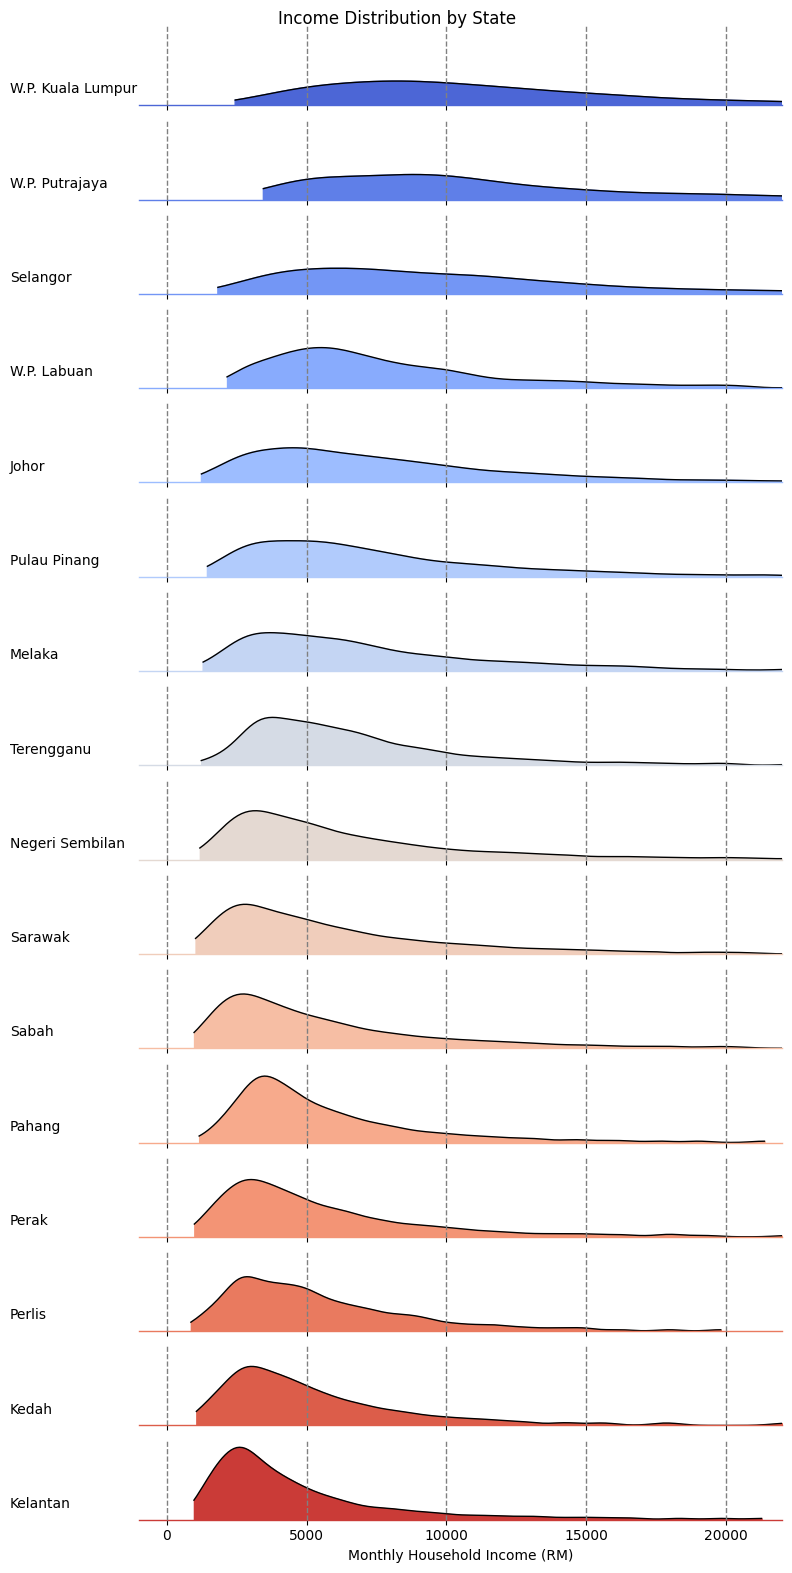

In [7]:
# generate a color palette
pal = sns.color_palette(palette='coolwarm', n_colors=len(states))

# generate a FacetGrid
grid = sns.FacetGrid(statesdf, row='state', hue='state', aspect=8, height=1, palette=pal, xlim=(-1000, 22000), ylim=(0, 0.00025))

# add kdeplots for each state
grid.map(sns.kdeplot, 'minimum', bw_adjust=0.4, clip_on=True, fill=True, alpha=1, linewidth=1, cut=0)

# add blackline as contour for each kdeplot
grid.map(sns.kdeplot, 'minimum', bw_adjust=0.4, clip_on=True, color='black', lw=1, cut=0)

# add horizontal lines for each kdeplot
grid.refline(y=0, linewidth=1, linestyle='-', color=None, clip_on=False)

# add vertical reference lines
for x_value in [0, 5000, 10000, 15000, 20000]:
    grid.refline(x=x_value, linewidth=1, linestyle='--', color='gray', clip_on=False)

def label(state, color, label):
    ax = plt.gca()
    ax.text(-0.2, 0.2, label, fontweight=8, color='black',
            ha="left", va="center", transform=ax.transAxes)

grid.map(label, 'state')

# get the subplots to overlap
grid.fig.subplots_adjust(hspace=-0.4)

# remove axes titles, yticks and spines
grid.set_titles('')
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.xlabel('Monthly Household Income (RM)', fontweight=12, fontsize=10)
grid.fig.suptitle('Income Distribution by State',
               ha='center',
               fontsize=12,
               fontweight=12)

plt.tight_layout()
plt.show()

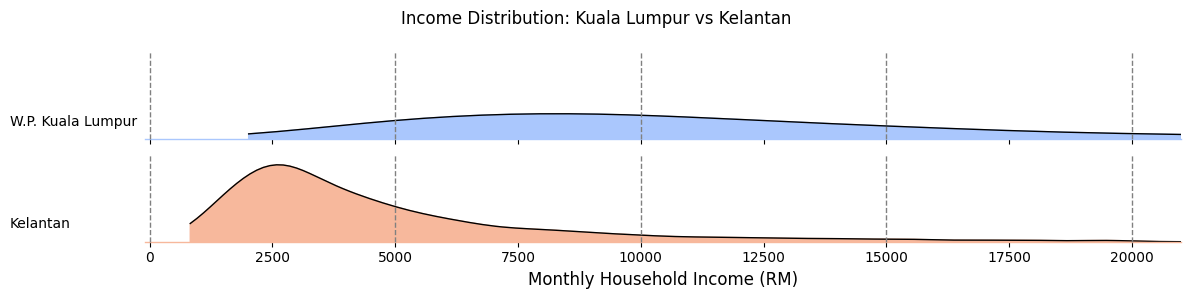

In [8]:
# create a df with only KL and Kelantan
klkeldf = statesdf[statesdf['state'].str.contains("Kuala Lumpur|Kelantan") == True]

# generate a color palette
pal2 = sns.color_palette(palette='coolwarm', n_colors=2)

# generate a FacetGrid
g = sns.FacetGrid(klkeldf, row='state', hue='state', aspect=8, height=1.5, palette=pal2, xlim=(-100, 21000), ylim=(0, 0.00025))

# add kdeplots for each state
g.map(sns.kdeplot, 'mean', bw_adjust=0.4, clip_on=True, fill=True, alpha=1, linewidth=1, cut=0)

# add blackline as contour for each kdeplot
g.map(sns.kdeplot, 'mean', bw_adjust=0.4, clip_on=True, color='black', lw=1, cut=0)

# add horizontal lines for each kdeplot
g.refline(y=0, linewidth=1, linestyle='-', color=None, clip_on=False)

# add vertical reference lines
for x_value in [0, 5000, 10000, 15000, 20000]:
    g.refline(x=x_value, linewidth=1, linestyle='--', color='gray', clip_on=False)

def label2(state, color, label):
    ax2 = plt.gca()
    ax2.text(-0.13, 0.2, label, fontweight=8, color='black',
            ha="left", va="center", transform=ax2.transAxes)

g.map(label2, 'state')

# get the subplots to overlap
g.fig.subplots_adjust(hspace=0.5)

# remove axes titles, yticks and spines
g.set_titles('')
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.xlabel('Monthly Household Income (RM)', fontweight=12, fontsize=12)
g.fig.suptitle('Income Distribution: Kuala Lumpur vs Kelantan',
               ha='center',
               fontsize=12,
               fontweight=12)

plt.tight_layout()
plt.show()

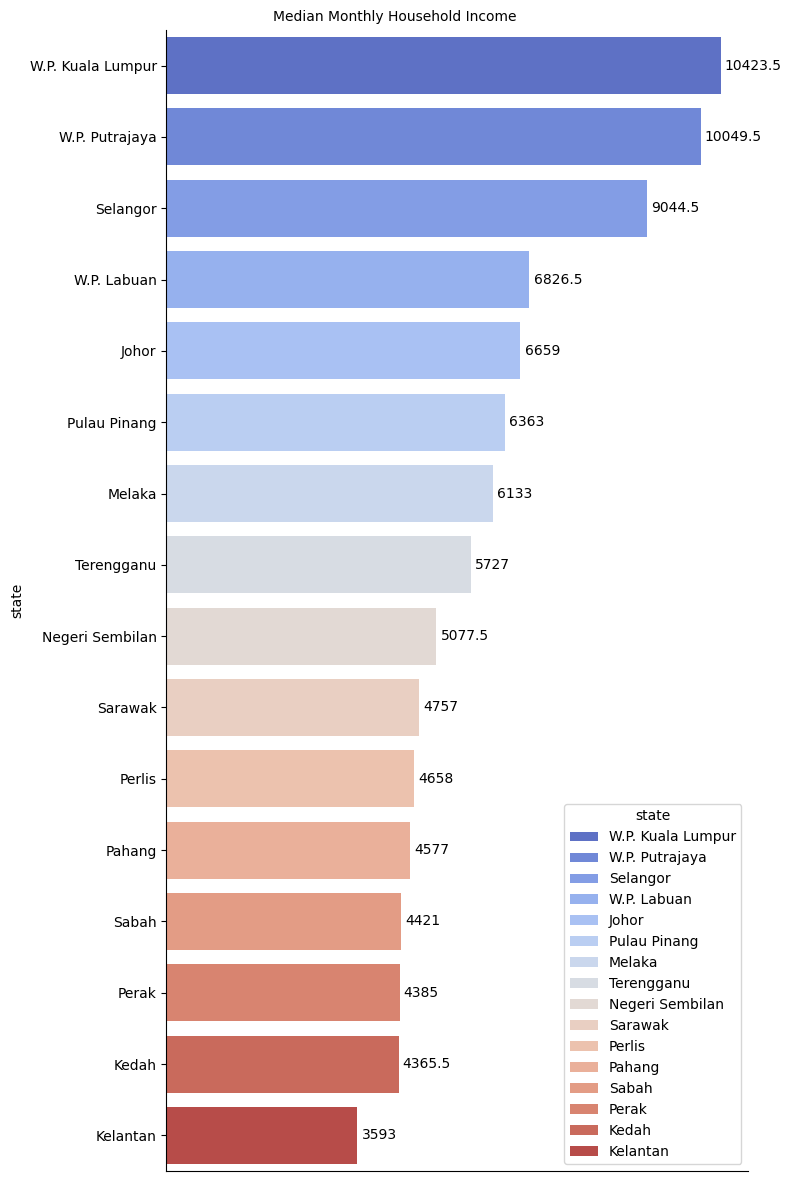

In [9]:
# generate income median for each state
state_median_serie = statesdf.groupby('state')['median'].median()
statesdf['state_median'] = statesdf['state'].map(state_median_serie)
statesdf = statesdf.sort_values(by="state_median", ascending=False)

# generate barplot for state medians
plt.figure(figsize=(8, 12))
g2 = sns.barplot(data=statesdf, x="state_median", y="state", hue="state", orient='h', dodge=False, palette='coolwarm', width=0.8)

for bars in g2.containers:
    g2.bar_label(bars, padding= 3, fontsize= 10)
    
g2.figure.suptitle('Median Monthly Household Income',
               ha='center',
               fontsize=10,
               fontweight=10)

g2.set(xticks=[], xlabel="")
sns.despine()

plt.tight_layout()
plt.show()